In [129]:
#import csv
#f = open("/Users/karasu/Downloads/提供データ/csv/children.csv", 'r')
#tsv = csv.reader(f, delimiter = '\t')
#for row in tsv:
#    print(row)
#f.close()
import pandas as pd
import numpy as np
children=pd.read_csv('/Users/karasu/Downloads/提供データ/csv/children.csv',header=None,sep=' ') #provided by KIKUCHI(100)
print(children)
#children.describe()

                                        0
0                ,id,user_id,birthday,sex
1       659404,814428,609644,2017-11-01,2
2     1803815,2082902,306058,2018-02-01,1
3      712207,871971,1363608,2013-04-01,1
4      666254,821895,1259008,2018-11-01,1
..                                    ...
96   1521829,1771348,2608557,2021-01-01,0
97    955177,1142836,1821999,2019-06-01,2
98   1704055,1974540,2833738,2020-11-01,1
99      189427,280720,281491,2016-09-01,0
100  1832293,2113635,2987768,2020-12-01,1

[101 rows x 1 columns]


In [2]:
import time,datetime
#leadtime1 =(pd.to_datetime(children['birthday'])).dt.days
#leadtime1 = pd.to_timedelta(pd.to_datetime(data['B'])-pd.to_datetime(data['A'])).dt.days
#print(pd.to_datetime(data['B'])-pd.to_datetime(data['A']))
#print(leadtime1)

In [4]:
#import csv
#f = open("/Users/karasu/Downloads/提供データ/users.tsv", 'r')
#tsv = csv.reader(f, delimiter = '\t')
#for row in tsv:
#    print(row)

### id:ユーザーID   generation_id:世代ID    prefecture_id:都道府県ID     created:アプリ登録日時

In [7]:
import csv
tsv_file='/Users/karasu/Downloads/提供データ/users.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('users.csv',index=False)
users = pd.read_csv('users.csv')
print(users.head())

   id  generation_id  prefecture_id              created
0   1            NaN            NaN  2014-04-25 11:46:58
1   2            NaN            NaN  2014-04-25 11:47:29
2   3            NaN            NaN  2014-04-25 12:02:02
3   4            NaN            NaN  2014-04-25 12:25:05
4   5            NaN            NaN  2014-04-25 18:32:30


In [41]:
print(users.shape)
print(users.describe)
generation = users["generation_id"]
print(generation.shape)                             #All information of the output

(2935754, 4)
<bound method NDFrame.describe of               id  generation_id  prefecture_id             created
0              1            NaN            NaN 2014-04-25 11:46:58
1              2            NaN            NaN 2014-04-25 11:47:29
2              3            NaN            NaN 2014-04-25 12:02:02
3              4            NaN            NaN 2014-04-25 12:25:05
4              5            NaN            NaN 2014-04-25 18:32:30
...          ...            ...            ...                 ...
2935749  3037785            4.0           28.0 2021-07-31 23:51:59
2935750  3037787            NaN            NaN 2021-07-31 23:55:09
2935751  3037788            NaN            NaN 2021-07-31 23:56:44
2935752  3037789            NaN            NaN 2021-07-31 23:56:57
2935753  3037790            NaN            NaN 2021-07-31 23:57:19

[2935754 rows x 4 columns]>
(2935754,)


In [11]:
users["generation_id"].isnull().sum()

2526262

In [12]:
2526262/2935754

0.8605155609087137

In [13]:
users["prefecture_id"].isnull().sum()

1963598

In [14]:
1963598/2935754

0.6688564505064116

#### generation_id missing rate= 86%.   prefecture_id missing rate=67%

In [15]:
from datetime import datetime
now=datetime.now()
print(now)

2021-11-03 20:34:57.897906


In [42]:
tsv_file='/Users/karasu/Downloads/提供データ/children.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('children.csv',index=False)
children= pd.read_csv('children.csv')
print(children.head())

   id  user_id    birthday  sex
0   3       12  2014-06-01    1
1   4       12  2013-09-01    2
2   5     1518  2014-06-01    2
3  10      522  2013-07-01    1
4  12      332  2013-07-01    1


### id:子供ID    user_id:紐づくユーザーID    birthday:子供の誕生日    sex:子供の性別

In [125]:
sex=children['sex']
frequency_sex=pd.value_counts(sex)
print(frequency_sex)

1    713041
2    679819
0    487602
Name: sex, dtype: int64


## 0-unknown 1-male 2-female （male>female）¶

In [4]:
679819/487602

1.3942088014405192

In [1]:
765/728

1.0508241758241759

male/female=765/728w=1.0508241758241759 (2021.4.1)
#### from 総務省統計局https://www.stat.go.jp/data/jinsui/index.html

In [2]:
774/738

1.048780487804878

male/female=774/738=1.048780487804878 (2020.4.1)

In [3]:
785/747

1.0508701472556894

male/female=785/747=1.0508701472556894 (2019.4.1)

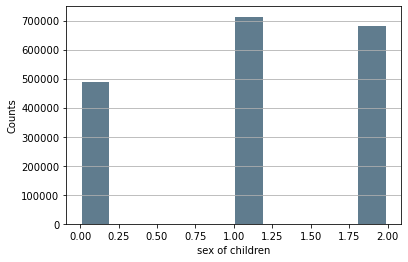

In [127]:
sex.plot.hist(grid=False, bins=10,density=False, rwidth=0.9,
                   color='#607c8e')
#plt.title('sex') or check density=True
plt.xlabel('sex of children')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=1)

In [18]:
birthday = children["birthday"]
print(birthday.head())
#birthdayに関しては、日にち部分を全て「1日」に前処理しています。

0    2014-06-01
1    2013-09-01
2    2014-06-01
3    2013-07-01
4    2013-07-01
Name: birthday, dtype: object


In [19]:
birthday.min(), birthday.max() #check the data of time()

('1614-03-01', '2026-05-01')

In [162]:
#age=pd.to_datetime(age,format='%Y/%m/%d',errors = 'coerce')
#print(age.head())

In [22]:
df = pd.DataFrame(children)
df['age'] = pd.to_datetime(df.birthday,errors = 'coerce') ##do not add errors='coerce',there will be an error
df['age'] ##Out of bounds nanosecond timestamp: 1614-03-01 00:00:00

0         2014-06-01
1         2013-09-01
2         2014-06-01
3         2013-07-01
4         2013-07-01
             ...    
1880457   2020-04-01
1880458   2021-11-01
1880459   2022-05-01
1880460   2022-06-01
1880461   2021-07-01
Name: age, Length: 1880462, dtype: datetime64[ns]

In [23]:
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
#define a function to get the age from a date of birth (DOB).

In [24]:
age=df['age'].apply(lambda x: from_dob_to_age(x)) #apply the function to calculate the age of children
print(age.head())

0    7.0
1    8.0
2    7.0
3    8.0
4    8.0
Name: age, dtype: float64


In [45]:
children['age'] = age #insert new column age

In [26]:
print(children.head())

   id  user_id    birthday  sex  age
0   3       12  2014-06-01    1  7.0
1   4       12  2013-09-01    2  8.0
2   5     1518  2014-06-01    2  7.0
3  10      522  2013-07-01    1  8.0
4  12      332  2013-07-01    1  8.0


In [27]:
age.min(), age.max() 

(-5.0, 329.0)

In [28]:
print(age.shape)

(1880462,)


In [29]:
print(age.describe())

count    1.880460e+06
mean     3.402670e+00
std      3.034841e+00
min     -5.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      3.290000e+02
Name: age, dtype: float64


In [31]:
unborn=children[(children['age'] < 0.0)] #unborn child

###  26745/1880462    #Ratio of unborn children=0.014222568709178915

In [32]:
ageover10=children[(children['age'] > 10.0)] #Children over 10 years old

### 56839/1880462  Ratio of children over 10 years of age=0.03022608273924174

In [35]:
tsv_file='/Users/karasu/Downloads/提供データ/users.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('users.csv',index=False)
users= pd.read_csv('users.csv')
print(users.head(5))

   id  generation_id  prefecture_id              created
0   1            NaN            NaN  2014-04-25 11:46:58
1   2            NaN            NaN  2014-04-25 11:47:29
2   3            NaN            NaN  2014-04-25 12:02:02
3   4            NaN            NaN  2014-04-25 12:25:05
4   5            NaN            NaN  2014-04-25 18:32:30


In [34]:
print(users.describe())

                 id  generation_id  prefecture_id
count  2.935754e+06  409492.000000  972156.000000
mean   1.516592e+06       3.777664      20.834732
std    8.774991e+05       1.166101      12.200719
min    1.000000e+00       1.000000       1.000000
25%    7.569172e+05       3.000000      12.000000
50%    1.514598e+06       4.000000      20.000000
75%    2.274695e+06       5.000000      28.000000
max    3.037790e+06       7.000000      47.000000


In [36]:
created = users["created"]
print(created.head())

dd = pd.DataFrame(users)
dd['created'] = pd.to_datetime(dd.created,errors = 'coerce') ##do not add errors='coerce',there will be an error
#dd['created']

0    2014-04-25 11:46:58
1    2014-04-25 11:47:29
2    2014-04-25 12:02:02
3    2014-04-25 12:25:05
4    2014-04-25 18:32:30
Name: created, dtype: object


In [43]:
def interval_statistics(data, intervals):
    if len(data) == 0:
        return
    for num in data:
        for interval in intervals:
            lr = tuple(interval.split('~'))
            left, right = float(lr[0]), float(lr[1])
            if left <= num <= right:
                intervals[interval] += 1
    for key, value in intervals.items():
        print("%10s" % key, end='')  # 借助 end=''可以不换行with end=''can not wrap
        print("%10s" % value, end='')  # "%10s" align right
        print('%16s' % '{:.3%}'.format(value * 1.0 / len(data)))


if __name__ == '__main__' :
    start = -5  # left end of interval
    number_of_interval = 67  #number of intervals 329+5/5=66.8
    length = 5 # length of intervals
    intervals = {'{:.3f}~{:.3f}'.format(length*x+start, length*(x+1)+start): 0 for x in range(number_of_interval)}  #generate intervals
    # print(intervals)
    data = age
    # print(data)
    interval_statistics(data, intervals)

-5.000~0.000    199126         10.589%
0.000~5.000   1588528         84.475%
5.000~10.000    429185         22.823%
10.000~15.000     57393          3.052%
15.000~20.000     15039          0.800%
20.000~25.000      4916          0.261%
25.000~30.000      1488          0.079%
30.000~35.000       610          0.032%
35.000~40.000       219          0.012%
40.000~45.000        84          0.004%
45.000~50.000        25          0.001%
50.000~55.000        13          0.001%
55.000~60.000         6          0.000%
60.000~65.000         3          0.000%
65.000~70.000         5          0.000%
70.000~75.000         5          0.000%
75.000~80.000         2          0.000%
80.000~85.000         1          0.000%
85.000~90.000         0          0.000%
90.000~95.000         0          0.000%
95.000~100.000         1          0.000%
100.000~105.000         2          0.000%
105.000~110.000         2          0.000%
110.000~115.000         2          0.000%
115.000~120.000         0          0.

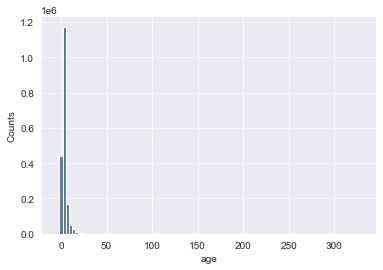

In [285]:
import matplotlib as mpt
age.plot.hist(grid=True, bins=100, rwidth=9,
                   color='#607c8e')
#plt.title('age')
plt.xlabel('age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

/Users/karasu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

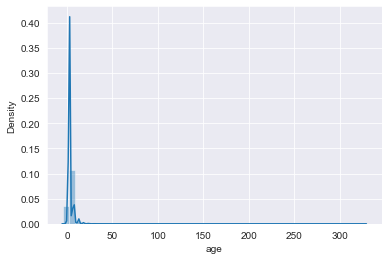

In [250]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(age)

/Users/karasu/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

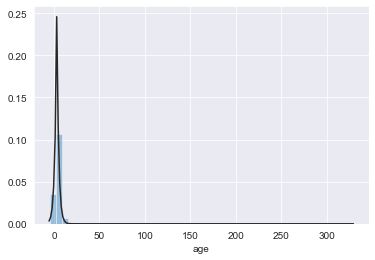

In [252]:
from scipy import stats
sns.distplot(age, fit=stats.laplace, kde=False)

In [122]:
age_clear = age[children.age<55.0]
age_clear.head()

0    7.0
1    8.0
2    7.0
3    8.0
4    8.0
Name: age, dtype: float64

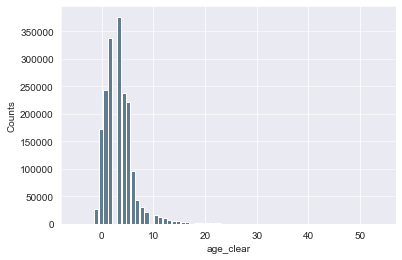

In [280]:
import matplotlib as mpt
age_clear.plot.hist(grid=True, bins=67,density=False, rwidth=0.9,
                   color='#607c8e')
#plt.title('age')density=True
plt.xlabel('age_clear')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [303]:
age_clear2 = age[children.age<15]
age_clear2.head()

0    7.0
1    8.0
2    7.0
3    8.0
4    8.0
Name: age, dtype: float64

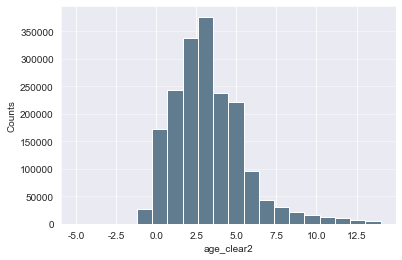

In [310]:
age_clear2.plot.hist(grid=True, bins=20,density=False, rwidth=1,
                   color='#607c8e')
#plt.title('age')density=True
plt.xlabel('age_clear2')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.5)

In [60]:
generation=users['generation_id']
prefecture=users['prefecture_id']

4.0    144705
3.0    107773
5.0     75788
2.0     39080
6.0     28426
1.0     13152
7.0       568
Name: generation_id, dtype: int64


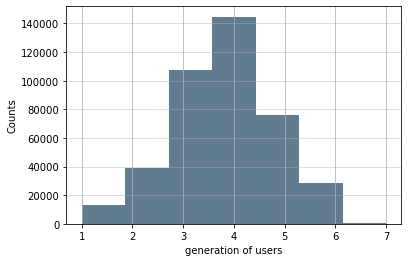

In [58]:
frequency_gen=pd.value_counts(generation)
print(frequency_gen)
generation.plot.hist(grid=True, bins=7,density=False, rwidth=1.5,
                   color='#607c8e')
#plt.title('generation') or check density=True
plt.xlabel('generation of users')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.5)
#generation.describe()  count=409492.000000

13.0    104020
27.0     73469
14.0     68753
23.0     65069
11.0     58259
12.0     48067
1.0      44744
40.0     44251
28.0     42074
22.0     25174
8.0      22270
34.0     21930
4.0      20145
26.0     18004
47.0     15998
10.0     15265
9.0      15215
7.0      15022
33.0     14399
15.0     14394
43.0     14176
21.0     13803
20.0     13657
24.0     12585
46.0     12533
25.0     11254
38.0      9810
42.0      9636
44.0      9616
29.0      9553
45.0      8963
2.0       8725
35.0      8417
37.0      8029
3.0       7925
17.0      7557
6.0       7161
16.0      6347
41.0      6044
19.0      5976
30.0      5951
18.0      5381
5.0       5165
36.0      5015
39.0      4449
32.0      4010
31.0      3896
Name: prefecture_id, dtype: int64


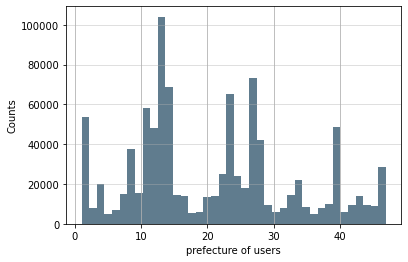

In [121]:
frequency_pre=pd.value_counts(prefecture)
print(frequency_pre)
prefecture.plot.hist(grid=True, bins=40,density=False, rwidth=1.5,
                   color='#607c8e')
#plt.title('prefecture') or check density=True
plt.xlabel('prefecture of users')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.5)
#prefecture.count()=972156

##      13-東京都　27-大坂府　14-神奈川    23-愛知県　11-埼玉県
##      31-鳥取県    32島根県     39-高知県    36-徳島県     5-秋田県
###   最も多い5つの地区と最も少ない5つの地区 Is it related to the size of the population in these areas?

In [46]:
age_clear3 = age[children.age<-4.0]
age_clear3.head(100)

1508406   -5.0
Name: age, dtype: float64

In [47]:
age_clear3 = age[children.age<1.0]
age_clear3.head(1000000)

26167      0.0
55322      0.0
84055      0.0
96519      0.0
99231      0.0
          ... 
1880456    0.0
1880458    0.0
1880459   -1.0
1880460   -1.0
1880461    0.0
Name: age, Length: 199126, dtype: float64

In [90]:
tsv_file='/Users/karasu/Downloads/提供データ/questions.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('questions.csv',index=False)
questions = pd.read_csv('questions.csv')
print(questions.head(5))

        id  user_id  category_id  \
0  6439861  1377081           11   
1  6439862  1189091           11   
2  6439864  1718860           11   
3  6439865  1675033           11   
4  6439866  1221269            3   

                                             content              created  
0  3歳の子供がまだ起きてます😫 夫と二人でカウントダウン予定が寝かしつけー。 幼児で、こんな夜...  2019-01-01 00:00:14  
1                              あけましておめでとうございます┏○ﾍﾟｺｯ  2019-01-01 00:00:16  
2                      笑ってはいけない☞無人島🏝📺に切り替えたら🦈って···😵💦  2019-01-01 00:00:47  
3                                 皆さま今年も宜しくお願いします😍❤️  2019-01-01 00:00:55  
4         明けましておめでとうございます！ 私は授乳中、旦那は別室でビール飲みながらテレビ！！  2019-01-01 00:01:10  


In [ ]:
#how to decide a question is hard to answar?


###  id:質問ID    user_id:質問したユーザーID    category_id:質問のカテゴリID   content:質問本文    created:質問日時

In [103]:
category=questions['category_id']

3     1874721
1      768923
11     529749
99     362606
5      328195
14     311963
7      209871
6      184784
9      182860
15     140269
12     135019
13     133031
16     109876
4      101349
18      78370
Name: category_id, dtype: int64


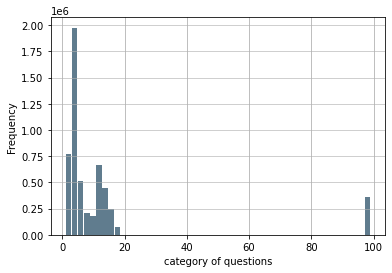

In [118]:
frequency_cate=pd.value_counts(category)
print(frequency_cate)
category.plot.hist(grid=True, bins=50,density=False, rwidth=0.9,
                   color='#607c8e')
#plt.title('generation') or check density=True
plt.xlabel('category of questions')
#plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

In [113]:
from collections import Counter

fre=Counter(category)
fre_category = sorted(fre.items(), key=lambda x: x[1], reverse=True)
print(fre_category)

[(3, 1874721), (1, 768923), (11, 529749), (99, 362606), (5, 328195), (14, 311963), (7, 209871), (6, 184784), (9, 182860), (15, 140269), (12, 135019), (13, 133031), (16, 109876), (4, 101349), (18, 78370)]


# Three level:
## level 1:
### The most concerned question is 3, which is 子育て・グッズ Parenting / Goods （圧倒的な数の質問！）
### then 1:妊娠・出産Pregnancy / childbirth     #then 11: 雑談・つぶやきChat / Tweet
## level 2:
### 99:その他の疑問， 5:ココロ・悩み ，14:家族・旦那 Has a close number of questions
## level 3:
### Remaining category: 7家事・料理,6妊活Pregnancy,9お金・保険,15お出かけgo out?,12お仕事,13ファッション・コスメ,16産婦人科・小児科,4サプリSupplement・健康,18住まい

# next: 検索(search.tsv)
### To analyze which problems mothers are more concerned about. （my idea: first use space to separate, exp.生後4ヶ月 授乳回数) \\ 

# MeCab: Yet Another Part-of-Speech and Morphological Analyzer 
### https://pypi.org/project/mecab-python3/

In [132]:
! pip3 install mecab-python3

     |████████████████████████████████| 281 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [135]:
! pip3 install --upgrade pip

     |████████████████████████████████| 1.7 MB 3.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:
      Successfully uninstalled pip-20.2.3


In [1]:
! pip3 install mecab-python3

In [144]:
! pip install --no-binary :all: mecab-python3